# Learning TensorFlow: Introduction to Convolutions

## What are convolutions?

One option when differentiating objects is to train an image classifier. For example, in the lab, Introduction to Computer Vision with TensorFlow, you trained an image classifier for fashion items using the Fashion MNIST dataset. This gives you a pretty accurate classifier, but with a constraint: the images were 28x28 gray scale and the item was centered in the image.

For example, here are a couple of the images in Fashion MNIST:

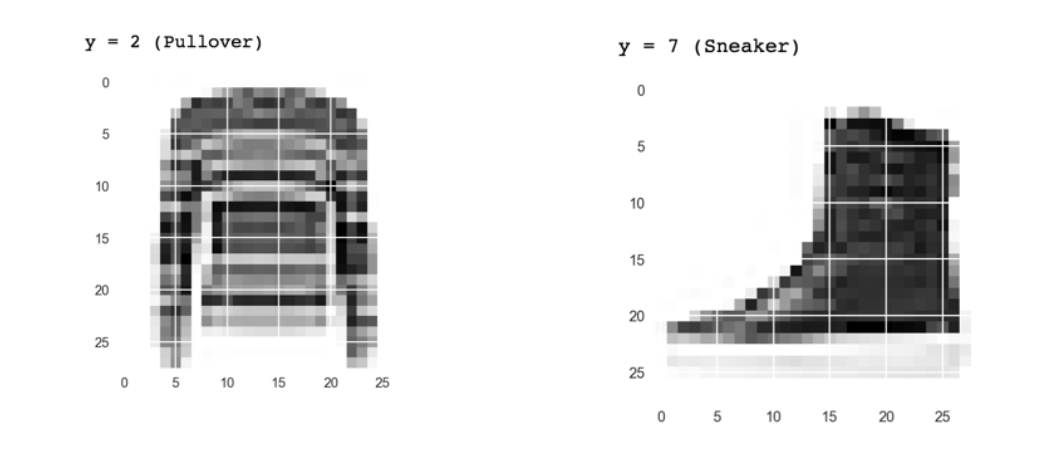

A deep neural network (DNN) is a neural network with a high level of complexity. It has an input layer, an output layer, and at least one hidden layer.  

The DNN you created in that lab simply learned from the raw pixels that made up a sweater and that made up a boot in this context. But consider how it might classify this image?

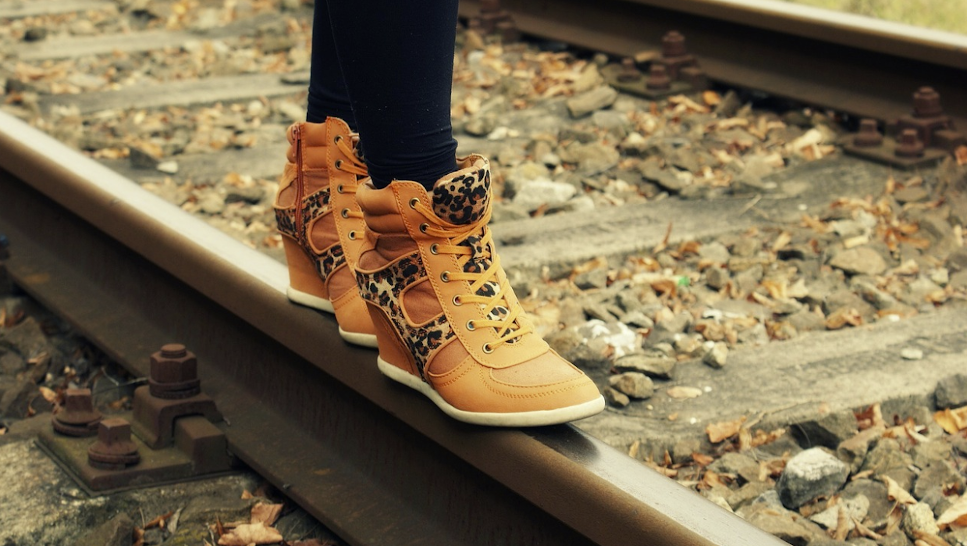

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 grayscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot actually is. Convolutions can solve this problem.

## Using convolutions

A convolution is a filter that passes over an image, processes it, and extracts features that show a commonality in the image. 

The process is simple. You scan every pixel in the image and then look at its neighboring pixels. You multiply out the values of these pixels by equivalent weights in a filter.

So, for example, consider this:

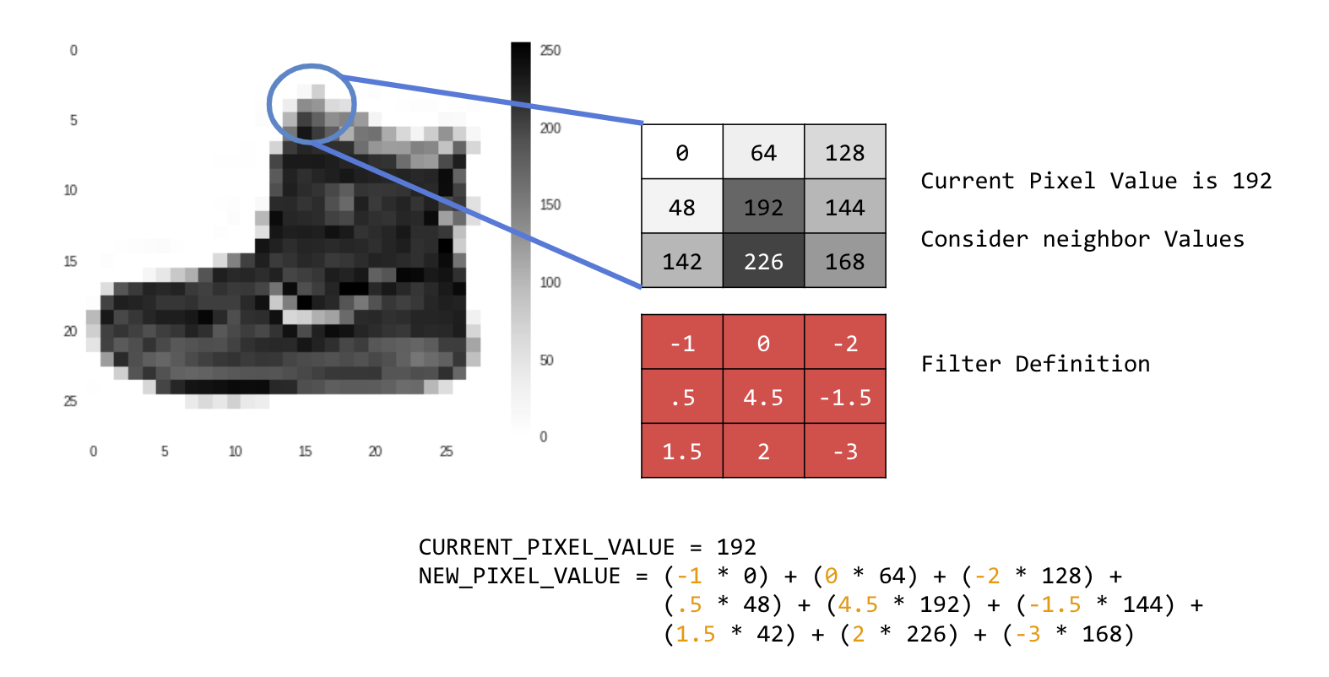

In this case a 3x3 convolution matrix is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighboring values, multiplying them out by the values specified in the filter, and making the new pixel value the final amount.

## Explore convolutions

Explore how convolutions work by creating a basic convolution on a 2D Grey Scale image.

1. First import the Python libraries, which include the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [ ]:
import numpy as np
from scipy import misc
i = misc.ascent()

2. Use the pyplot library to draw the image so you know what it looks like.

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

You can see that this is an image of a stairwell. There are lots of features in here that you can play with seeing if you can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so you can create the transformed image by just copying that array.

4. Get the dimensions of the image so you can loop over it later.

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

5. Create a filter as a 3x3 array.

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

6. Now create a convolution. Notice in the code, you iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

For example, the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. You then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally you load the new value into the transformed image.

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

7. Plot the image to see the effect of the convolution!

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

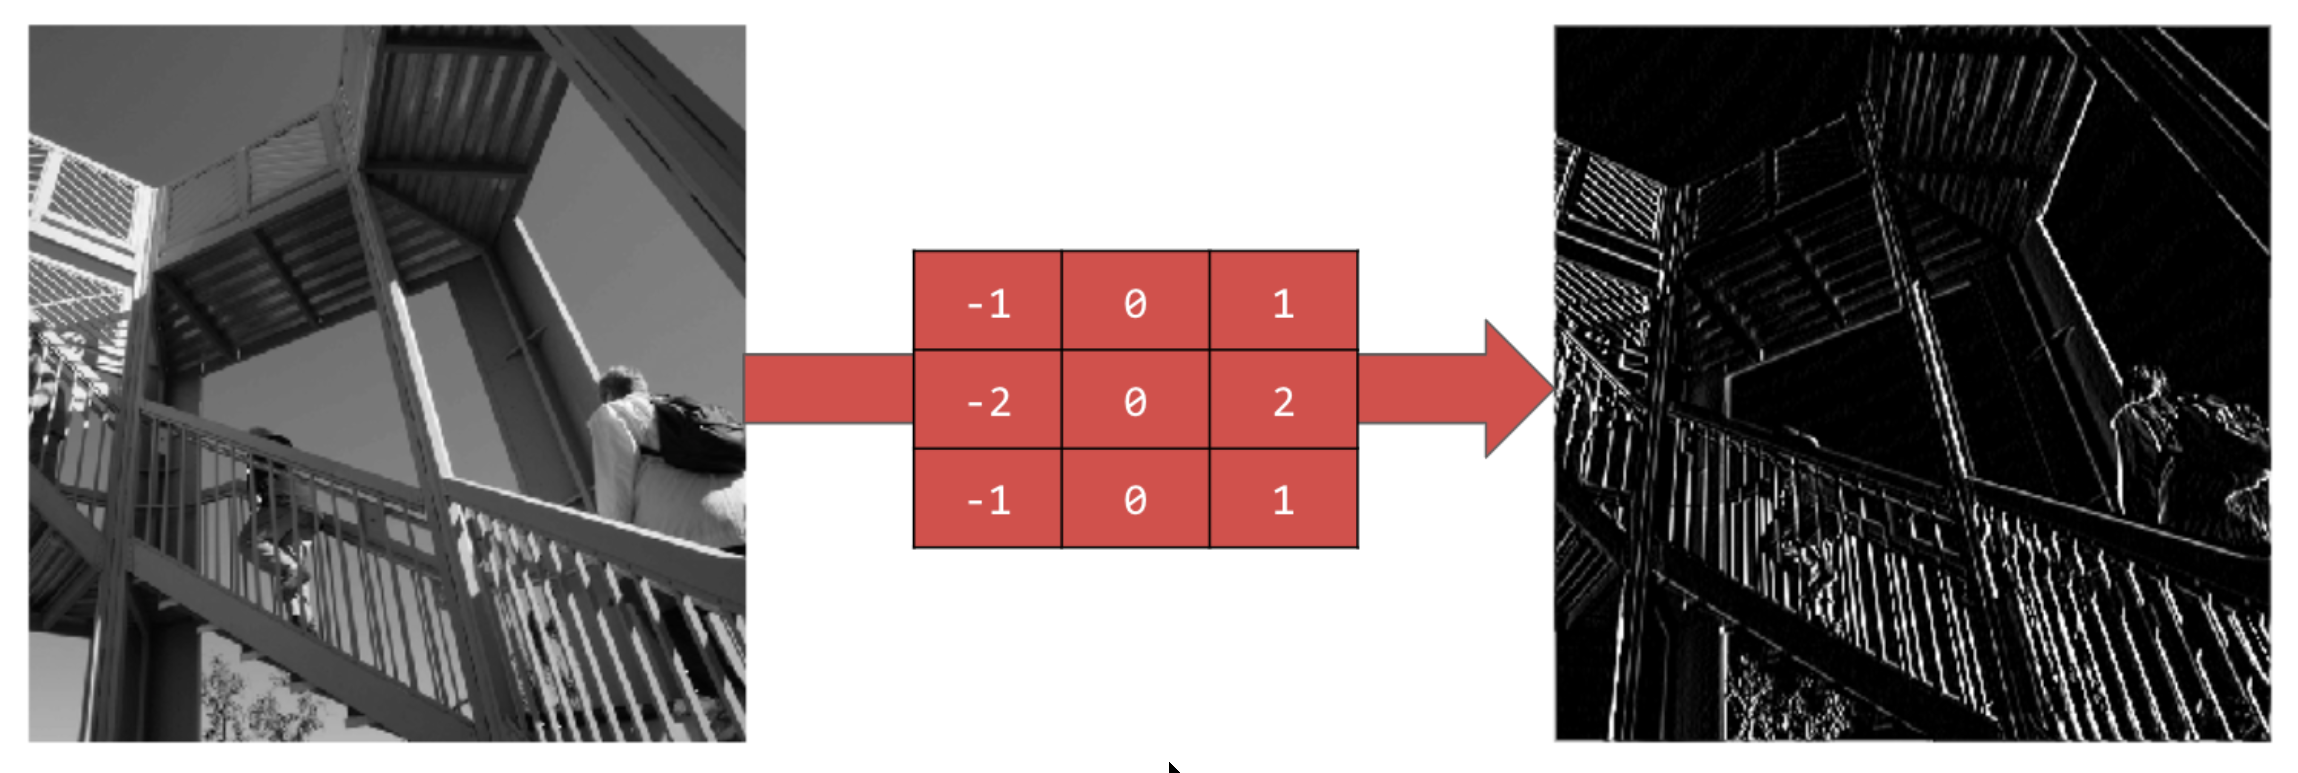

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

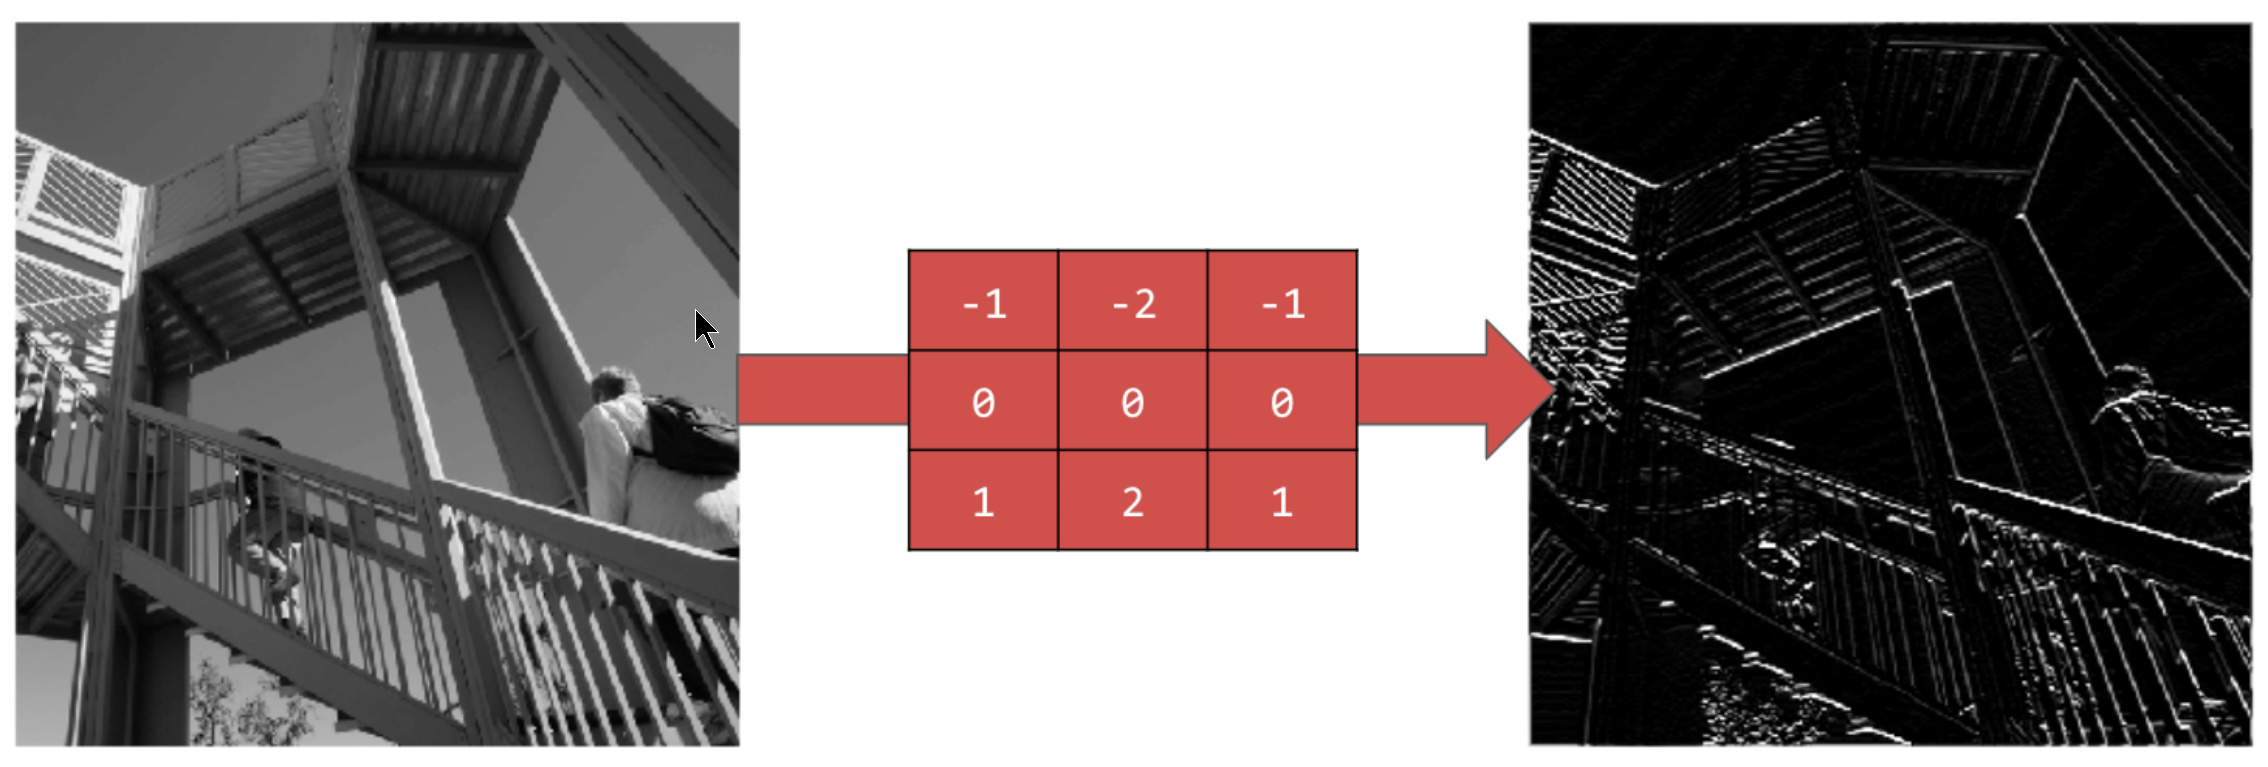

8. (Optional) Experiment using different filter values.

## Pooling

In addition to using convolutions, pooling helps detect features. The goal is to reduce the overall amount of information in an image while maintaining the features that are detected as present.

There are different types of pooling. For this lab, you'll use MAX pooling.

The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

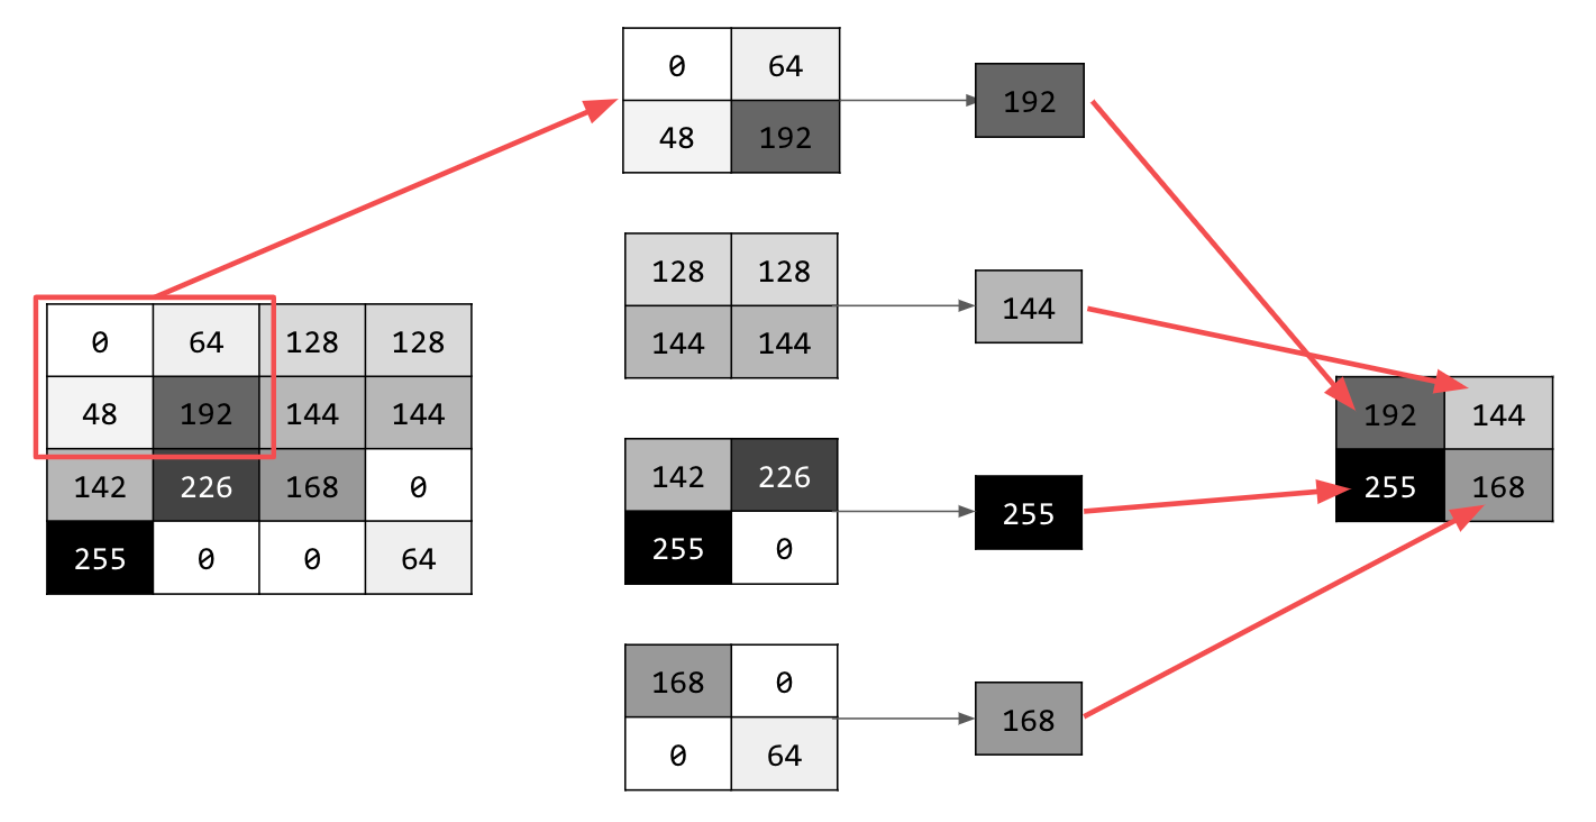

This following code will show a (2, 2) pooling. Run it to see the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.savefig('final.png')
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Return to your lab page to verify your progress and complete the lab!